# Bike Renting Demand : 
For this notebooke, I'm using Kaggele bakie sharing demand dataset! 

In [112]:
# # Import libraries. begin, let's import the necessary libraries that we'll be using throughout this notebook:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from datetime import datetime
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_squared_log_error
from sklearn.ensemble import StackingRegressor
from sklearn.metrics import mean_squared_log_error
from sklearn.ensemble import RandomForestRegressor
from statsmodels.api import OLS, add_constant
from mpl_toolkits.mplot3d import Axes3D



In [29]:
# Load tha train data.
train_df = pd.read_csv("/Users/ambl/Downloads/train.csv")
train_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [28]:
# Load tha test data.
test_df = pd.read_csv("/Users/ambl/Downloads/test.csv")
test_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [55]:
train_df['season'].value_counts()

season
4    2734
2    2733
3    2733
1    2686
Name: count, dtype: int64

In this dataset, columnsare mapped with numbers by default. 

### Seasons: 
 1 : Winter

 2 : Spring

 3 : Summer 

 4 : Autumn 

### Weather: 
1 : 'Clear',

2 : 'Mist',

3: 'Rain',

4: 'Snow'



In [30]:
print(train_df.shape)

(10886, 12)


In [31]:
train_df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

### Preparation the train data

In [32]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [36]:
# Seeing if there are dublicated.
train_df.duplicated().sum()

0

In [33]:
# # Convert the 'datetime' column to datetime format
train_df['datetime'] = pd.to_datetime(train_df['datetime'], format = '%Y-%m-%d %H:%M:%S')

In [34]:
train_df['datetime']

0       2011-01-01 00:00:00
1       2011-01-01 01:00:00
2       2011-01-01 02:00:00
3       2011-01-01 03:00:00
4       2011-01-01 04:00:00
                ...        
10881   2012-12-19 19:00:00
10882   2012-12-19 20:00:00
10883   2012-12-19 21:00:00
10884   2012-12-19 22:00:00
10885   2012-12-19 23:00:00
Name: datetime, Length: 10886, dtype: datetime64[ns]

In [35]:
total = train_df.isnull().sum().sort_values(ascending=False)
percent = (train_df.isnull().sum()/train_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(30)

,Total,Percent
datetime,0,0.0
season,0,0.0
holiday,0,0.0
workingday,0,0.0
weather,0,0.0
temp,0,0.0
atemp,0,0.0
humidity,0,0.0
windspeed,0,0.0
casual,0,0.0


In [37]:
train_df['date'] =train_df['datetime'].dt.date
train_df['time'] = train_df['datetime'].dt.time

In [39]:
train_df['date'][0]

datetime.date(2011, 1, 1)

In [62]:
# Extract the month as its name from the 'datetime' column and create a new 'month' column
# Extract the year from the 'datetime' column and create a new 'year' column
# Extract the day as its name from the 'datetime' column and create a new 'day' column
# Extract the hour from the 'datetime' column and create a new 'hour' column

train_df['year'] =train_df['datetime'].dt.year.astype(int)
train_df['month'] = train_df['datetime'].dt.month.astype(int)
train_df['day'] = train_df['datetime'].dt.day.astype(int)
train_df['day_of_week'] = pd.to_datetime(train_df['datetime']).dt.dayofweek.astype(float)
train_df['hour']=train_df['datetime'].dt.hour.astype(int)

In [63]:
train_df['month'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [64]:
train_df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'date', 'time', 'year', 'month', 'day', 'day_of_week', 'hour'],
      dtype='object')

In [67]:
# counting all values for each unique values 
montly_features = train_df[['season', 'holiday', 'workingday', 'weather',  'year', 'month', 'day', 'hour']]

for i in montly_features:
    print(train_df[i].value_counts().sort_values)
    print('-' * 50)

<bound method Series.sort_values of season
4    2734
2    2733
3    2733
1    2686
Name: count, dtype: int64>
--------------------------------------------------
<bound method Series.sort_values of holiday
0    10575
1      311
Name: count, dtype: int64>
--------------------------------------------------
<bound method Series.sort_values of workingday
1    7412
0    3474
Name: count, dtype: int64>
--------------------------------------------------
<bound method Series.sort_values of weather
1    7192
2    2834
3     859
4       1
Name: count, dtype: int64>
--------------------------------------------------
<bound method Series.sort_values of year
2012    5464
2011    5422
Name: count, dtype: int64>
--------------------------------------------------
<bound method Series.sort_values of month
5     912
6     912
7     912
8     912
12    912
10    911
11    911
4     909
9     909
2     901
3     901
1     884
Name: count, dtype: int64>
--------------------------------------------------
<bo

### EDA

In [83]:
df = train_df.drop(columns=['datetime', 'holiday', 'temp', 'casual','registered', 'date', 'time','day'], axis = 1)

In [84]:
df.columns

Index(['season', 'workingday', 'weather', 'atemp', 'humidity', 'windspeed',
       'count', 'year', 'month', 'day_of_week', 'hour'],
      dtype='object')

/var/folders/t8/b35g9qgj44lc2lk1cvtblc5w0000gp/T/ipykernel_81513/4210085459.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')


[Text(0, 0, '0'),
 Text(1, 0, '1'),
 Text(2, 0, '2'),
 Text(3, 0, '3'),
 Text(4, 0, '4'),
 Text(5, 0, '5'),
 Text(6, 0, '6'),
 Text(7, 0, '7'),
 Text(8, 0, '8'),
 Text(9, 0, '9'),
 Text(10, 0, '10'),
 Text(11, 0, '11'),
 Text(12, 0, '12'),
 Text(13, 0, '13'),
 Text(14, 0, '14'),
 Text(15, 0, '15'),
 Text(16, 0, '16'),
 Text(17, 0, '17'),
 Text(18, 0, '18'),
 Text(19, 0, '19'),
 Text(20, 0, '20'),
 Text(21, 0, '21'),
 Text(22, 0, '22'),
 Text(23, 0, '23')]

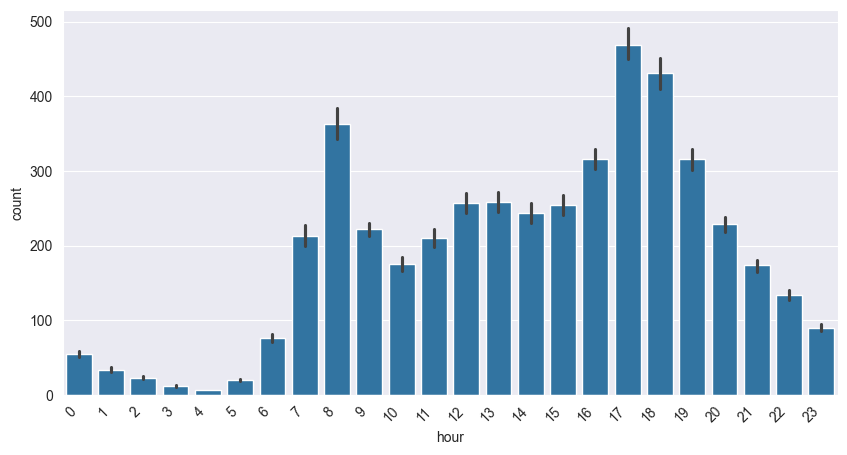

In [85]:
plt.figure(figsize=(10,5))
sns.set_style('darkgrid')
chart = sns.barplot(x = df['hour'], y = df['count'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

<Axes: xlabel='hour'>

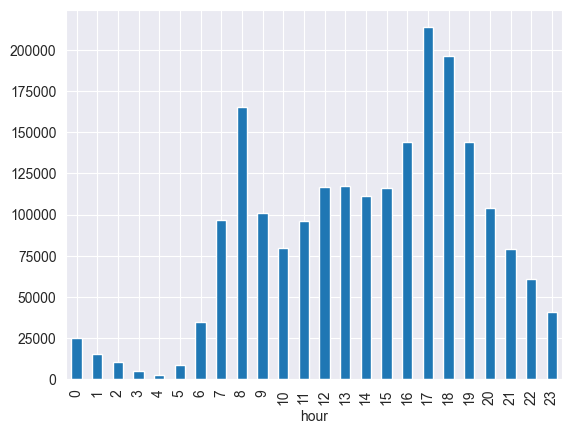

In [71]:
df.groupby('hour')['count'].sum().plot.bar()

/var/folders/t8/b35g9qgj44lc2lk1cvtblc5w0000gp/T/ipykernel_81513/509174846.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(),  horizontalalignment='right')


[Text(0, 0, '1'), Text(1, 0, '2'), Text(2, 0, '3'), Text(3, 0, '4')]

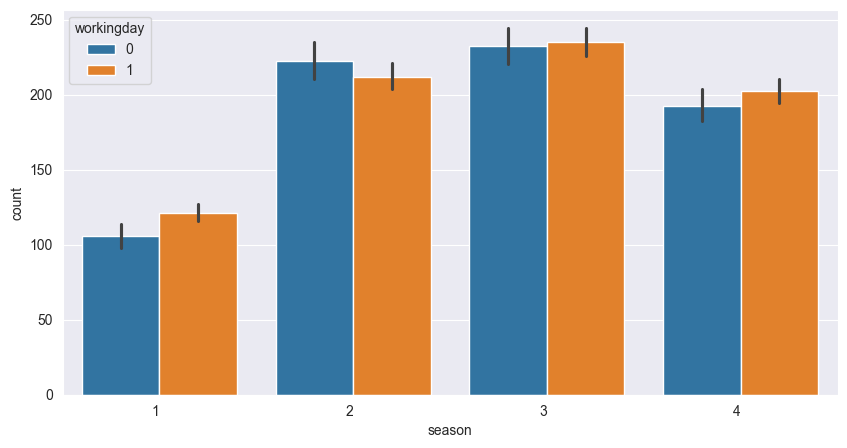

In [72]:
plt.figure(figsize=(10,5))
sns.set_style('darkgrid')
chart = sns.barplot(x = df['season'], y = df['count'], hue = df['workingday'])
chart.set_xticklabels(chart.get_xticklabels(),  horizontalalignment='right')

In [58]:
df['year']

0        2011.0
1        2011.0
2        2011.0
3        2011.0
4        2011.0
          ...  
10881    2012.0
10882    2012.0
10883    2012.0
10884    2012.0
10885    2012.0
Name: year, Length: 10886, dtype: float64

/var/folders/t8/b35g9qgj44lc2lk1cvtblc5w0000gp/T/ipykernel_81513/3470725307.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(),  horizontalalignment='right')


[Text(0, 0, '2011'), Text(1, 0, '2012')]

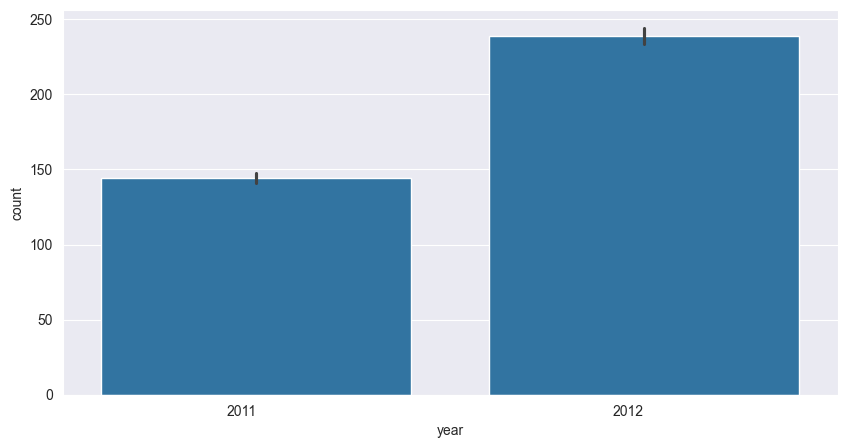

In [73]:
plt.figure(figsize=(10,5))
sns.set_style('darkgrid')
chart = sns.barplot(x = df['year'], y = df['count'])
chart.set_xticklabels(chart.get_xticklabels(),  horizontalalignment='right')

/var/folders/t8/b35g9qgj44lc2lk1cvtblc5w0000gp/T/ipykernel_81513/796613350.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(),  horizontalalignment='right')


[Text(0, 0, '1'),
 Text(1, 0, '2'),
 Text(2, 0, '3'),
 Text(3, 0, '4'),
 Text(4, 0, '5'),
 Text(5, 0, '6'),
 Text(6, 0, '7'),
 Text(7, 0, '8'),
 Text(8, 0, '9'),
 Text(9, 0, '10'),
 Text(10, 0, '11'),
 Text(11, 0, '12')]

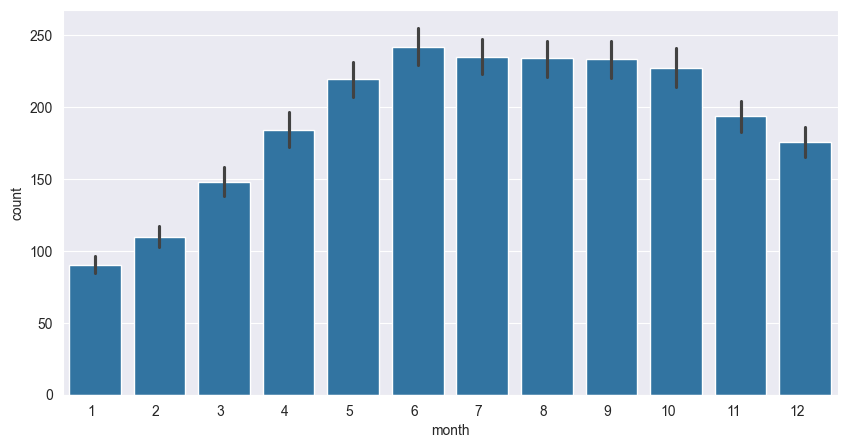

In [74]:
plt.figure(figsize=(10,5))
sns.set_style('darkgrid')
chart = sns.barplot(x = df['month'], y = df['count'])
chart.set_xticklabels(chart.get_xticklabels(),  horizontalalignment='right')

[Text(0, 0, '0.0'),
 Text(1, 0, '1.0'),
 Text(2, 0, '2.0'),
 Text(3, 0, '3.0'),
 Text(4, 0, '4.0'),
 Text(5, 0, '5.0'),
 Text(6, 0, '6.0')]

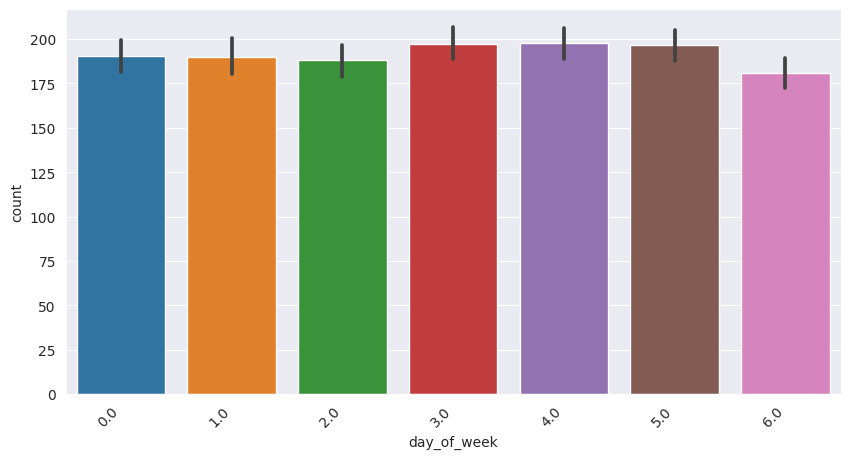

In [24]:
plt.figure(figsize=(10,5))
sns.set_style('darkgrid')
chart = sns.barplot(x = df['day_of_week'], y = df['count'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

[Text(0, 0, '1'), Text(1, 0, '2'), Text(2, 0, '3'), Text(3, 0, '4')]

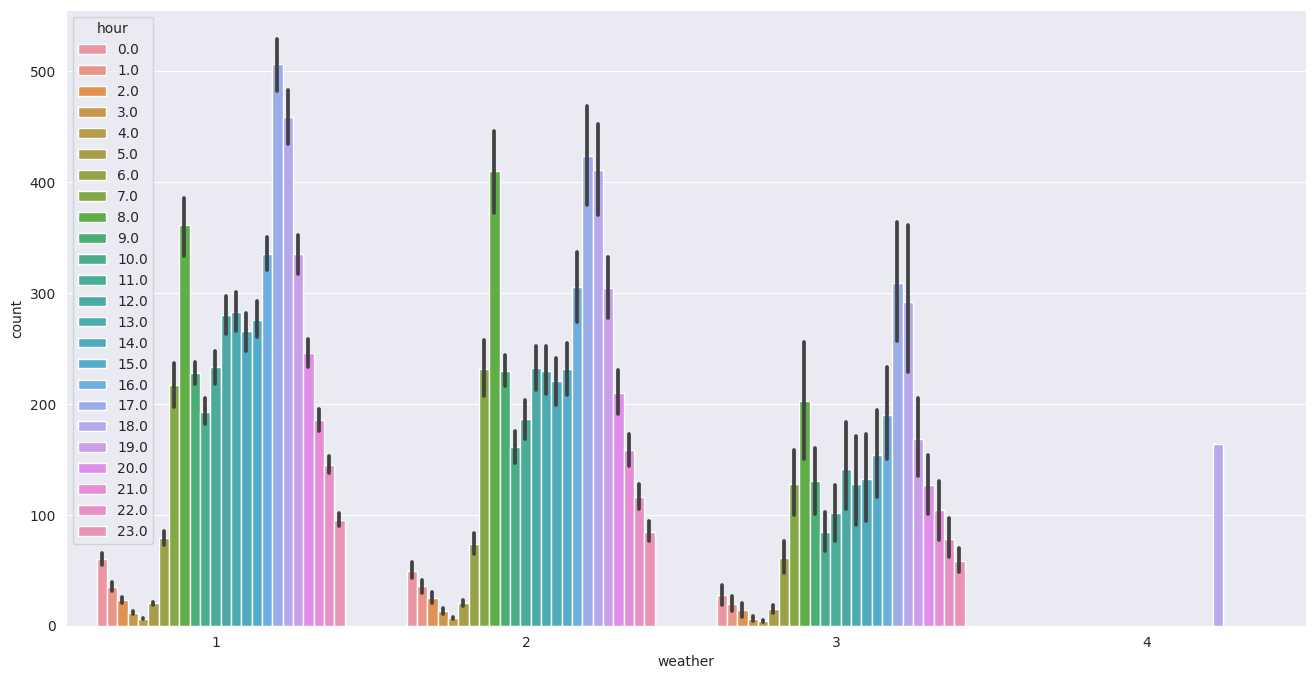

In [25]:
plt.figure(figsize=(16,8))
sns.set_style('darkgrid')
chart = sns.barplot(x = df['weather'], y = df['count'], hue= df['hour'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=0, horizontalalignment='right')

In [79]:
df.shape

(10886, 12)

In [86]:
# Split train data into train and test.
X_train, X_test = train_test_split(df, test_size=0.25, random_state=42)

In [88]:
corrMatrix =pd.DataFrame(X_train.corr())
corrMatrix

,season,workingday,weather,atemp,humidity,windspeed,count,year,month,day_of_week,hour
season,1.000000,0.001322,0.010093,0.259334,0.193355,-0.143768,0.162900,-0.007058,0.971643,-0.014511,-0.013241
workingday,0.001322,1.000000,0.033554,0.023029,-0.002480,0.006431,0.013213,-0.000157,0.007410,-0.699397,0.005642
weather,0.010093,0.033554,1.000000,-0.056270,0.406415,0.008169,-0.127838,-0.012606,0.014058,-0.043572,-0.026890
atemp,0.259334,0.023029,-0.056270,1.000000,-0.051131,-0.052358,0.385754,0.055844,0.258461,-0.044187,0.136883
humidity,0.193355,-0.002480,0.406415,-0.051131,1.000000,-0.316548,-0.318591,-0.077943,0.207720,-0.034383,-0.281665
windspeed,-0.143768,0.006431,0.008169,-0.052358,-0.316548,1.000000,0.102783,-0.013371,-0.146692,-0.016929,0.151718
count,0.162900,0.013213,-0.127838,0.385754,-0.318591,0.102783,1.000000,0.257132,0.165618,-0.005114,0.406170
year,-0.007058,-0.000157,-0.012606,0.055844,-0.077943,-0.013371,0.257132,1.000000,-0.007451,-0.011780,-0.003000
month,0.971643,0.007410,0.014058,0.258461,0.207720,-0.146692,0.165618,-0.007451,1.000000,-0.006552,-0.014610
day_of_week,-0.014511,-0.699397,-0.043572,-0.044187,-0.034383,-0.016929,-0.005114,-0.011780,-0.006552,1.000000,-0.007681


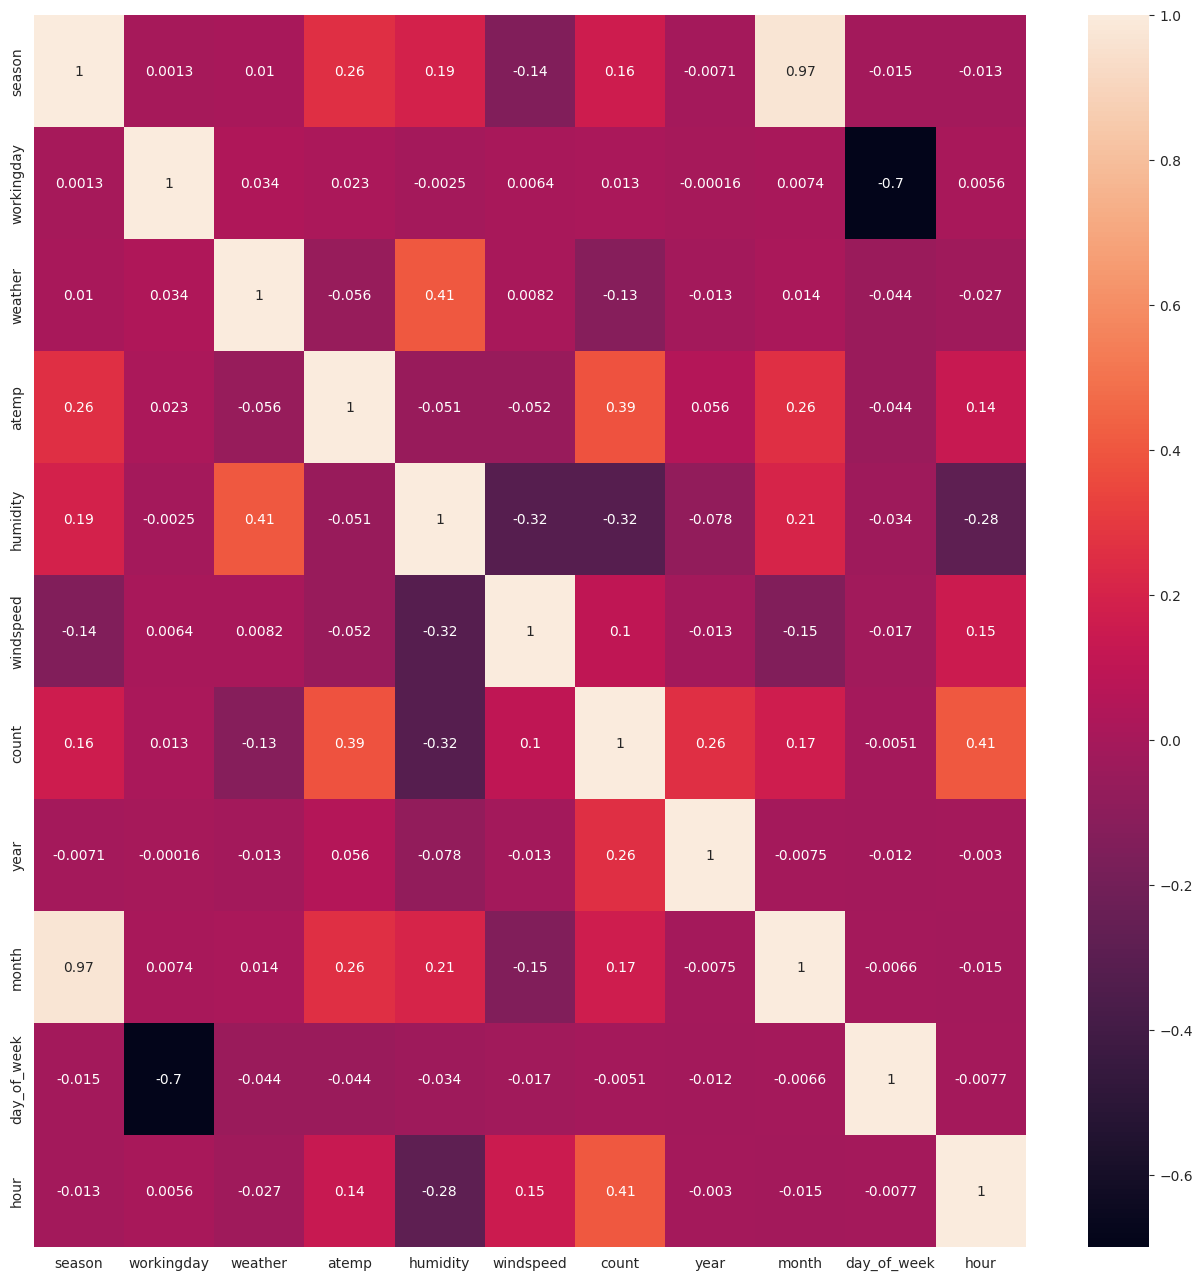

In [31]:
plt.figure(figsize=(16,16))
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [89]:
set(df['windspeed'])

{0.0,
 6.0032,
 7.0015,
 8.9981,
 11.0014,
 12.998,
 15.0013,
 16.9979,
 19.0012,
 19.9995,
 22.0028,
 23.9994,
 26.0027,
 27.9993,
 30.0026,
 31.0009,
 32.9975,
 35.0008,
 36.9974,
 39.0007,
 40.9973,
 43.0006,
 43.9989,
 46.0022,
 47.9988,
 50.0021,
 51.9987,
 56.9969}

In [33]:
set(df['atemp'])

{0.76,
 1.515,
 2.275,
 3.03,
 3.79,
 4.545,
 5.305,
 6.06,
 6.82,
 7.575,
 8.335,
 9.09,
 9.85,
 10.605,
 11.365,
 12.12,
 12.88,
 13.635,
 14.395,
 15.15,
 15.91,
 16.665,
 17.425,
 18.18,
 18.94,
 19.695,
 20.455,
 21.21,
 21.97,
 22.725,
 23.485,
 24.24,
 25.0,
 25.76,
 26.515,
 27.275,
 28.03,
 28.79,
 29.545,
 30.305,
 31.06,
 31.82,
 32.575,
 33.335,
 34.09,
 34.85,
 35.605,
 36.365,
 37.12,
 37.88,
 38.635,
 39.395,
 40.15,
 40.91,
 41.665,
 42.425,
 43.18,
 43.94,
 44.695,
 45.455}

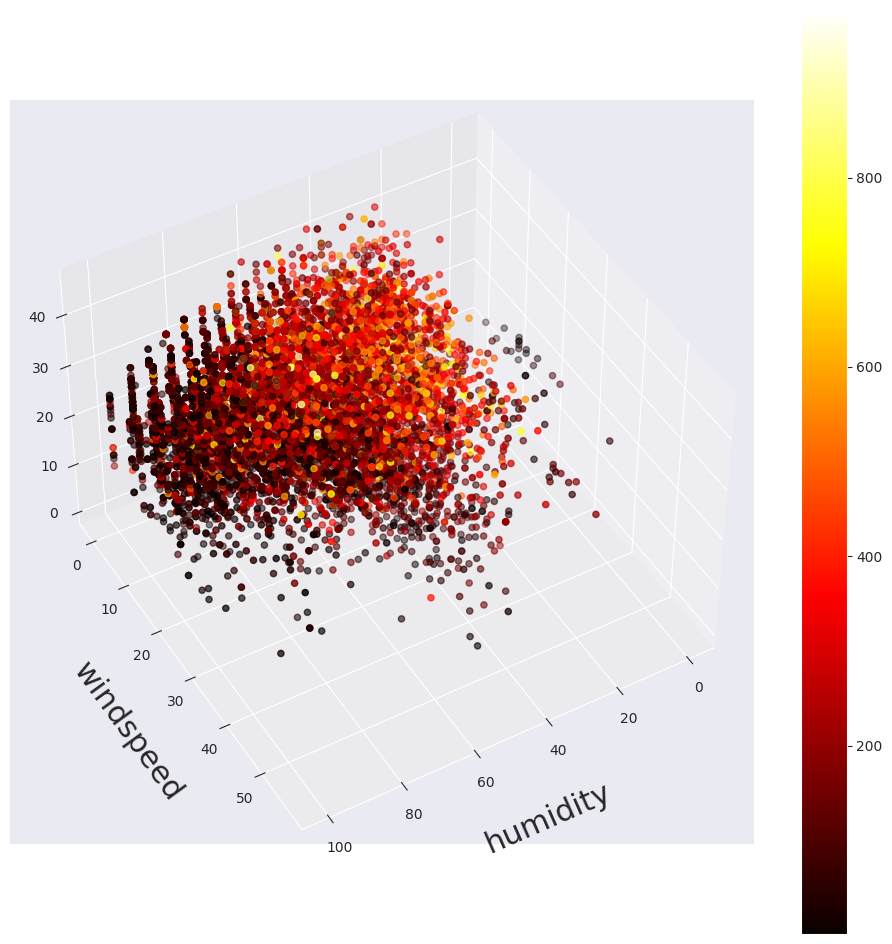

In [34]:
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')

x = df['humidity']
y = df['windspeed']
z = df['atemp']
c = df['count']

img = ax.scatter(x, y, z, c=c, cmap=plt.hot())
plt.xlabel('humidity', fontsize=22, labelpad=20)
plt.ylabel('windspeed', fontsize=22, labelpad=20)
#plt.zlabel('atemp', fontsize=22, labelpad=25)
ax.view_init(45,60)
fig.colorbar(img)
plt.show()

In [90]:
y_train = X_train['count']
X_train = X_train.drop(columns = ['count'], axis=1)

In [91]:
y_test = X_test['count']
X_test = X_test.drop(columns = ['count'], axis=1)

In [92]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler


cols_to_norm = ['atemp','windspeed', 'humidity']
X_train[cols_to_norm] = MinMaxScaler().fit_transform(X_train[cols_to_norm])
X_test[cols_to_norm] = MinMaxScaler().fit_transform(X_test[cols_to_norm])

#X_train_scaled = preprocessing.normalize(X_train)
#X_test_scaled = preprocessing.normalize(X_test)

In [38]:
#X_train_scaled

In [95]:
linearRegressor = LinearRegression()
linearRegressor.fit(X_train, y_train)
y_predicted = linearRegressor.predict(X_test)
y_predicted_rmse = y_predicted.clip(0)

In [96]:
y_predicted_rmse.min()

0.0

In [97]:
mse = mean_squared_error(y_test, y_predicted)
r = r2_score(y_test, y_predicted)
mae = mean_absolute_error(y_test,y_predicted)
msle=mean_squared_log_error(y_predicted_rmse,y_test)
rmsle=np.sqrt(msle)

print('RMLSE for the data:',rmsle)
print("Mean Squared Error:",mse)
print("R score:",r)
print("Mean Absolute Error:",mae)

RMLSE for the data: 1.2981258070696158
Mean Squared Error: 20107.488747072606
R score: 0.38722910411318245
Mean Absolute Error: 106.37357952957697


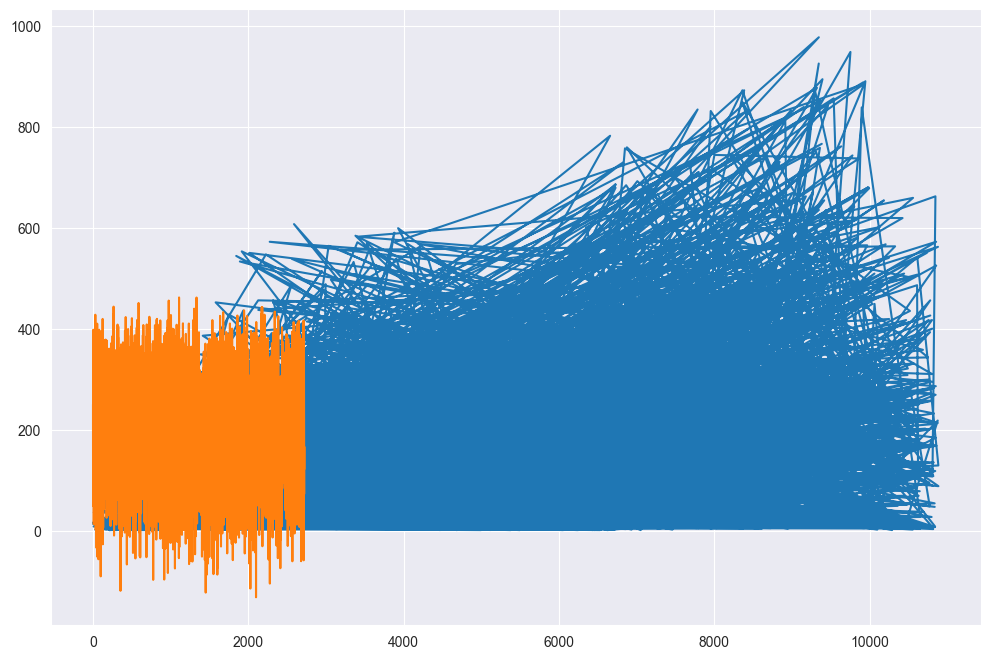

In [98]:
plt.figure(figsize=(12,8))
plt.plot(y_test)
plt.plot(y_predicted)

In [99]:
X_train, X_test = train_test_split(df, test_size=0.25, random_state=42)
y_train = X_train['count']
X_train = X_train.drop(columns = ['count'], axis=1)
y_test = X_test['count']
X_test = X_test.drop(columns = ['count'], axis=1)

In [102]:
from statsmodels.api import OLS, add_constant
ols = OLS(y_train, add_constant(X_train))
ols_results = ols.fit()
ols_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.390
Model:                            OLS   Adj. R-squared:                  0.389
Method:                 Least Squares   F-statistic:                     520.4
Date:                Fri, 23 Aug 2024   Prob (F-statistic):               0.00
Time:                        14:16:16   Log-Likelihood:                -52016.
No. Observations:                8164   AIC:                         1.041e+05
Df Residuals:                    8153   BIC:                         1.041e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.653e+05   6345.599    -26.048      0.000   -1.78e+05   -1.53e+05
season         -6.7276      5.960     -1.129      0.259     -18.411       4.955
workingday      5.5359      4.733      1.170      0.242      -3.742      14.814
weather        -4.3989      2.775     -1.585      0.113      -9.838       1.040
atemp           6.0629      0.195     31.062      0.000       5.680       6.445
humidity       -2.0314      0.101    -20.042      0.000      -2.230      -1.833
windspeed       0.6166      0.205      3.004      0.003       0.214       1.019
year           82.1835      3.154     26.054      0.000      76.000      88.367
month           9.9003      1.943      5.096      0.000       6.092      13.708
day_of_week     1.3937      1.104      1.263      0.207      -0.770       3.558
hour            7.9619      0.240     33.236      0.000       7.492       8.432
==============================================================================
Omnibus:                     1568.211   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2974.628
Skew:                           1.183   Prob(JB):                         0.00
Kurtosis:                       4.775   Cond. No.                     8.15e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.15e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [111]:
rf = RandomForestRegressor(max_depth=5, random_state=0)
rfe = RFE(rf, n_features_to_select=3)
rfe.fit(X_train, y_train)

rfe_df = pd.DataFrame({'support': rfe.support_, 'ranking': rfe.ranking_, 'feature': X_train.columns})
rfe_df.sort_values('ranking')

,support,ranking,feature
3,True,1,atemp
6,True,1,year
9,True,1,hour
7,False,2,month
0,False,3,season
1,False,4,workingday
8,False,5,day_of_week
4,False,6,humidity
2,False,7,weather
5,False,8,windspeed


In [106]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import numpy as np

# Define the parameter grid
rf = RandomForestRegressor(random_state=0)
rf_params = {'n_estimators': np.arange(25, 150, 25),
             'max_depth': np.arange(1, 11, 2),
             'min_samples_leaf': np.arange(2, 15, 3)}

# Create the GridSearchCV object
gs_rf = GridSearchCV(rf, rf_params, cv=3)
gs_rf.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=0),
             param_grid={'max_depth': array([1, 3, 5, 7, 9]),
                         'min_samples_leaf': array([ 2,  5,  8, 11, 14]),
                         'n_estimators': array([ 25,  50,  75, 100, 125])})

In [107]:
# Get the best parameters
best_params = gs_rf.best_params_

In [108]:
print (best_params)

{'max_depth': 9, 'min_samples_leaf': 2, 'n_estimators': 100}


In [109]:

best_params = {'n_estimators': 100,
               'max_depth':  9,
               'min_samples_leaf':2
              }

# Create and fit the RandomForestRegressor with the best parameters
RF = RandomForestRegressor(n_estimators=best_params['n_estimators'],
                          max_depth=best_params['max_depth'],
                          min_samples_leaf=best_params['min_samples_leaf'],
                          random_state=0)

model = RF.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Calculate the RMSLE
msle = mean_squared_log_error(y_pred, y_test)
rmsle = np.sqrt(msle)

print('RMSLE for the data:', rmsle)

RMSLE for the data: 0.36798247002373374
